<a href="https://colab.research.google.com/github/kartikayedito/Shadow_Removal/blob/main/Kartikay's_copy_of_shadow_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Towards Ghost-free Shadow Removal via <br>Dual Hierarchical Aggregation Network and Shadow Matting GAN

[Xiaodong Cun](http://vinthony.github.io), [Chi-Man Pun*](http://www.cis.umac.mo/~cmpun/) and Cheng Shi

University of Macau

This colab contains the demo of our AAAI 2020 paper.
More detail can be found in [Github](https://github.com/vinthony/ghost-free-shadow-removal) and [ArXiv](https://arxiv.org/abs/1911.08718).

# Environment Configuration

In [ ]:
## init all the necessary models
!rm -rf *

!pip install -U --no-cache-dir gdown --pre

!gdown https://drive.google.com/uc?id=1r6QD7lEM6UTMbnoxEQqTsK0k0B8XziC1
!gdown https://drive.google.com/uc?id=1rEIWWLwEpbZGPyFUc9jSIQr78ZeQy5eZ
!unzip srdplus-pretrained.zip && rm srdplus-pretrained.zip

!git clone  https://github.com/vinthony/ghost-free-shadow-removal
!cp ghost-free-shadow-removal/networks.py .

vgg19_path = 'imagenet-vgg-verydeep-19.mat'
pretrain_model_path = 'srdplus-pretrained/'
sample_path = 'ghost-free-shadow-removal/Samples'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1r6QD7lEM6UTMbnoxEQqTsK0k0B8XziC1
To: /content/imagenet-vgg-verydeep-19.mat
100% 535M/535M [00:10<00:00, 50.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rEIWWLwEpbZGPyFUc9jSIQr78ZeQy5eZ
To: /content/srdplus-pretrained.zip
100% 320M/320M [00:05<00:00, 57.3MB/s]
Archive:  srdplus-pretrained.zip
   creating: srdplus-pretrained/
  inflating: srdplus-pretrained/checkpoint  
  inflating: srdplus-pretrained/model_best.ckpt.data-00000-of-00001  
  inflating: srdplus-pretrained/model_best.ckpt.index  
  inflating: srdplus-pretrained/model_best.ckpt.meta  
Cloning into 'ghost-free-shadow-removal'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
r

# Loading Pre-trained Model

In [ ]:
# loaded pretrained model and build the calculate graph

# !nvidia-smi
# https://stackoverflow.com/questions/73215696/did-colab-suspend-tensorflow-1-x
# %tensorflow_version 1.x 
!apt install cuda-10-0
!pip uninstall -y tensorflow
!apt install --allow-change-held-packages libcudnn7=7.6.5.32-1+cuda10.0
!pip install --upgrade tensorflow-gpu==1.13.1
!apt list -a libcudnn7

!nvidia-smi

%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from networks import build_aggasatt_joint

with tf.variable_scope(tf.get_variable_scope()):
    input=tf.placeholder(tf.float32,shape=[None,None,None,3])
    shadow_free_image=build_aggasatt_joint(input,64,vgg19_path)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
idtd_ckpt=tf.train.get_checkpoint_state(pretrain_model_path)
saver_restore=tf.train.Saver([var for var in tf.trainable_variables()])
print('loaded '+idtd_ckpt.model_checkpoint_path)
saver_restore.restore(sess,idtd_ckpt.model_checkpoint_path)

print(np.sum([np.prod(v.get_shape().as_list()) for v in tf.trainable_variables()]))



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cuda-command-line-tools-10-0 cuda-compiler-10-0 cuda-cublas-10-0
  cuda-cublas-dev-10-0 cuda-cudart-10-0 cuda-cudart-dev-10-0 cuda-cufft-10-0
  cuda-cufft-dev-10-0 cuda-cuobjdump-10-0 cuda-cupti-10-0 cuda-curand-10-0
  cuda-curand-dev-10-0 cuda-cusolver-10-0 cuda-cusolver-dev-10-0
  cuda-cusparse-10-0 cuda-cusparse-dev-10-0 cuda-demo-suite-10-0
  cuda-documentation-10-0 cuda-driver-dev-10-0 cuda-gdb-10-0
  cuda-gpu-library-advisor-10-0 cuda-libraries-10-0 cuda-libraries-dev-10-0
  cuda-license-10-0 cuda-memcheck-10-0 cuda-misc-headers-10-0 cuda-npp-10-0
  cuda-npp-dev-10-0 cuda-nsight-10-0 cuda-nsight-compute-10-0 cuda-nvcc-10-0
  cuda-nvdisasm-10-0 cuda-nvgraph-10-0 cuda-nvgraph-dev-10-0 cuda-nvjpeg-10-0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

[i] Hypercolumn ON, building hypercolumn features ... 


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.average_pooling2d instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


loaded srdplus-pretrained/model_best.ckpt
1724282.0


# Evaluation on SRD dataset

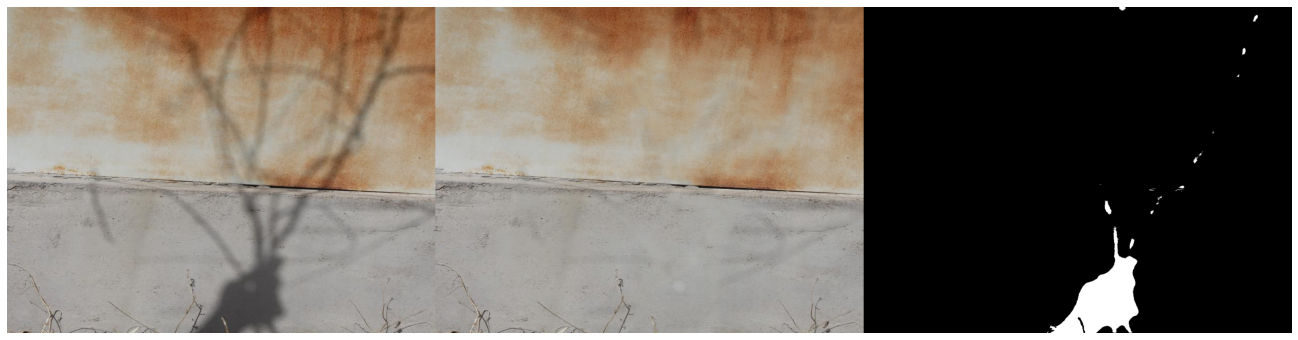

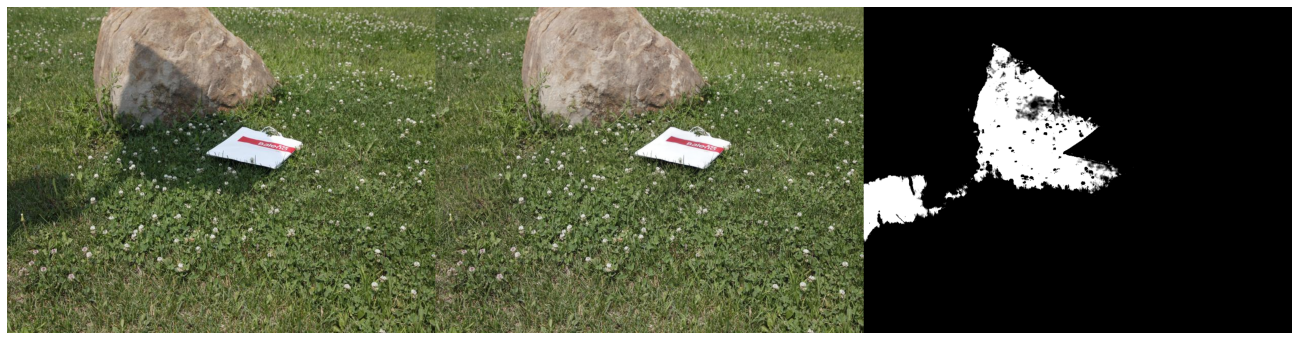

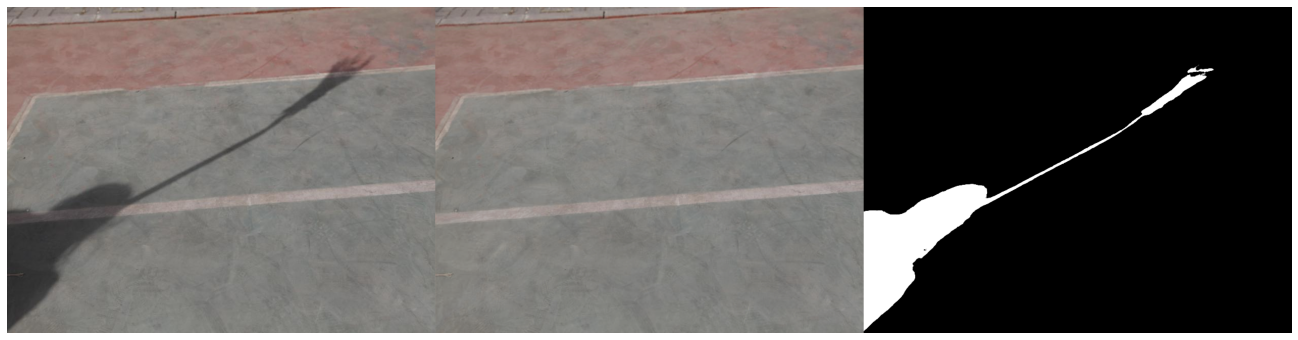

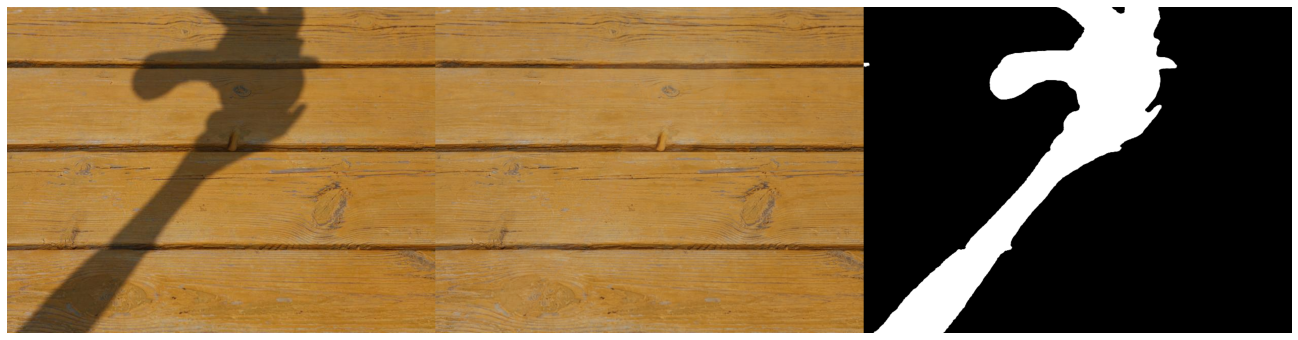

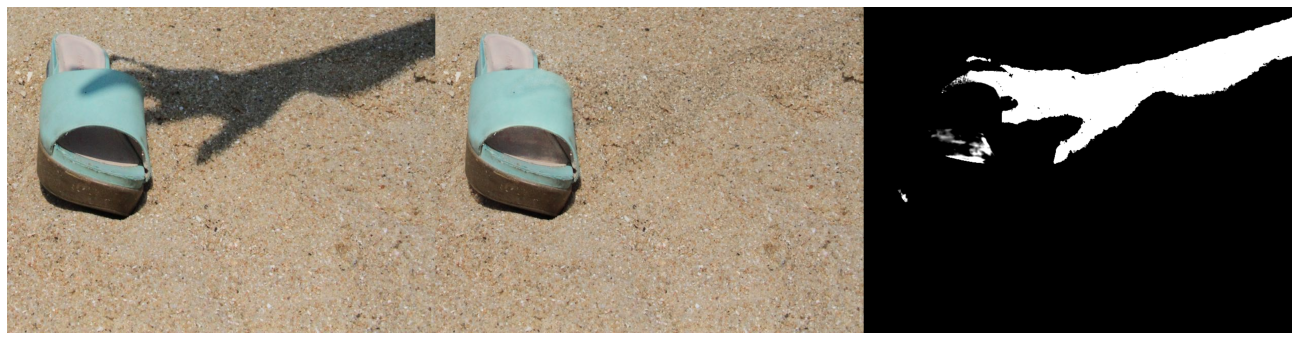

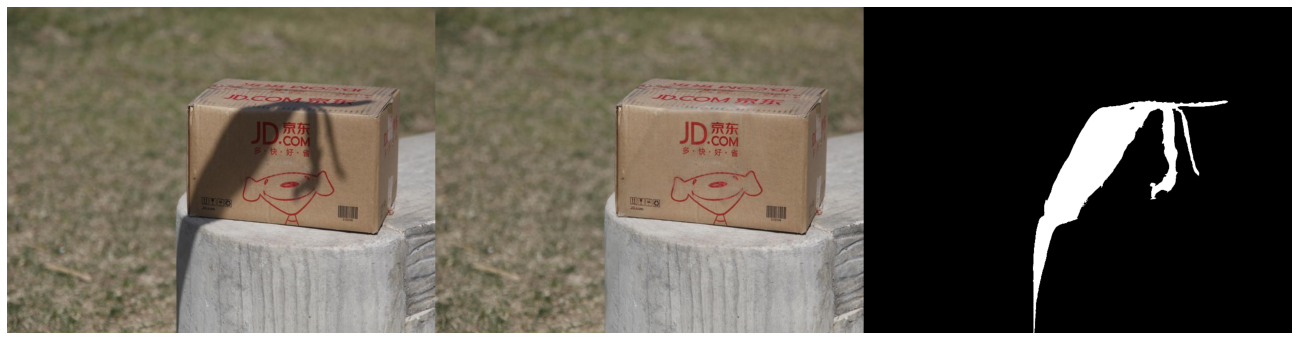

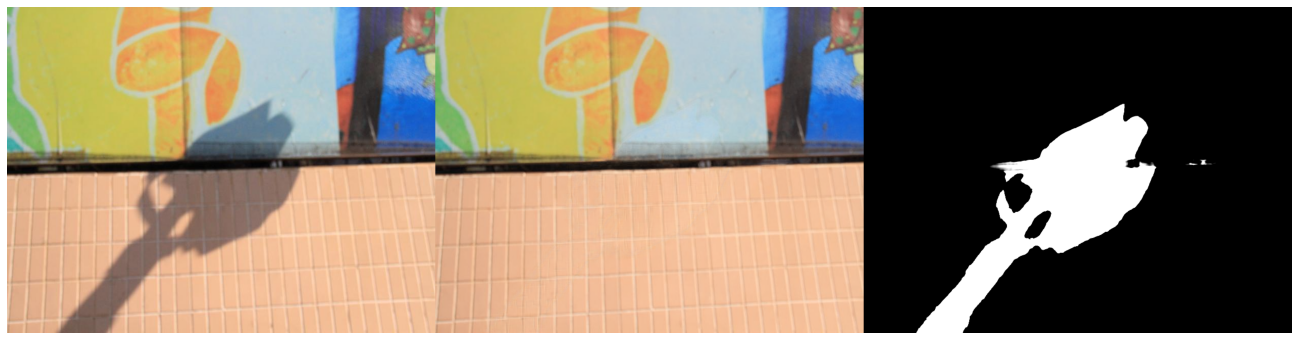

In [ ]:
import os,cv2
# some samples results.
plt.rcParams["figure.figsize"] = (24,6)

for img_path in [os.path.join(sample_path,x) for x in os.listdir(sample_path) if '.jpg' in x ]:

    plt.figure()
    plt.axis('off')
    
    iminput=cv2.imread(img_path,-1)
    imoutput = sess.run(shadow_free_image,feed_dict={input:np.expand_dims(iminput/255.,axis=0)})

    ## imoutput[0] means the shadow removal results while imoutput[1] means the shadow detection results.
    imremoval = np.uint8(np.squeeze(np.minimum(np.maximum(imoutput[0],0.0),1.0))*255.0)
    immask = np.uint8(np.squeeze(np.minimum(np.maximum(imoutput[1],0.0),1.0))*255.0)


    # cv2.imwrite('immask.png', immask)

    imcompare = np.concatenate([iminput,imremoval,np.repeat(np.expand_dims(immask,axis=2),3,2)],axis=1)

    # bgr->rgb
    plt.imshow(imcompare[...,::-1])
    plt.show()

# Test samples from web

In [ ]:
# get image from web.
import requests
from io import BytesIO
from PIL import Image

plt.rcParams["figure.figsize"] = (24,6)
# images from google photo
# [you can replace the url with our own data for testing!]
urls = [
'http://thumbs.dreamstime.com/b/%E7%9F%B3%E5%A4%B4%E9%9B%95%E5%88%BB%E4%BA%86%E8%87%AA%E7%84%B6%E8%B7%AF%E7%BA%B9%E7%90%86%EF%BC%8C%E4%BB%8E%E9%B9%85%E5%8D%B5%E7%9F%B3%E5%A4%A7%E8%80%81%E5%8F%A4%E8%80%81%E9%94%90%E8%A7%92%E7%9A%84%E7%9F%B3%E5%A4%B4%E7%9A%84%E5%A2%99%E5%A3%81%E6%9C%89%E9%95%87%E5%8E%8B%E7%9A%84%E5%9C%A8%E9%98%B4%E5%BD%B1-th-121672690.jpg',
'https://i.pinimg.com/564x/e9/97/bc/e997bc244390f34db43d0fe26b832213.jpg',
'http://thumbs.dreamstime.com/b/%E5%9C%A8%E5%A2%99%E5%A3%81%E4%B8%8A%E7%9A%84%E6%A0%91-%E5%BD%B1-96404210.jpg',
'http://thumbs.dreamstime.com/b/%E5%A4%A7%E6%A0%91%E6%9E%9D%E9%98%B4%E5%BD%B1%E7%9A%84%E6%8A%BD%E8%B1%A1%E8%87%AA%E7%84%B6%E6%A0%B7%E5%BC%8F%E5%9C%A8%E6%B5%85%E7%81%B0%E8%89%B2%E7%9A%84%E5%9D%9A%E7%A1%AC%E7%9F%B3%E6%B8%A3%E5%87%9D%E7%BB%93%E9%9D%A2%E8%83%8C%E6%99%AF%E5%9C%B0%E6%9D%BF%E4%B8%8A%E7%9A%84%E5%9C%A8%E5%A5%BD%E6%97%A5%E5%AD%90-129809634.jpg'
]

for url in urls:
  r = requests.get(url)
  # pil->numpy->bgr
  iminput = np.asarray(Image.open(BytesIO(r.content)))[...,::-1]
  imoutput = sess.run(shadow_free_image,feed_dict={input:np.expand_dims(iminput/255.,axis=0)})

  plt.figure()
  plt.axis('off')
  imoutput = np.uint8(np.squeeze(np.minimum(np.maximum(imoutput[0],0.0),1.0))*255.0)
  imcompare = np.concatenate([iminput,imoutput],axis=1)
  # bgr->rgb
  plt.imshow(imcompare[...,::-1])
  plt.show()